In [1]:
import pandas as pd
import heapq as hq

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Test case 1
processes = ['P0', 'P1', 'P2','P3']
arrival_time = [0,0,0,0]
burst_time = [4,2,1,3]
waiting_time = [6,1,0,3]
turnaround_time = [10,3,1,6]
complete_time = [10,3,1,6]

In [13]:
# test case 2
processes = ['P0', 'P1', 'P2','P3','P4']
arrival_time = [0,1,2,3,7]
burst_time = [3,2,1,1,1]
waiting_time = [0,4,1,1,0]
turnaround_time = [3,6,2,2,1]
complete_time = [3,7,4,5,8]

In [24]:
# test case 3
processes = ['A', 'B', 'C','D','E']
arrival_time = [0,0,2,3,1]
burst_time = [3,2,1,4,3]
waiting_time = [3,0,0,6,5]
turnaround_time = [6,2,1,10,8]
complete_time = [6,2,3,13,9]

In [ ]:
# test case 4
processes = ['P1','P2','P3','P4','P5','P6']
arrival_time = [0,25,30,60,100,105]
burst_time = [20,25,25,15,10,10]
waiting_time = [0,0,20,15,0,5]
turnaround_time = [20,25,45,30,10,15]
complete_time = [20,50,75,90,110,120]

In [25]:
expected_answer = pd.DataFrame({'Process':processes, 'Arrival Time':arrival_time, 'Burst Time':burst_time, 
                               'Waiting Time':waiting_time, 'Turn Around Time':turnaround_time, 'Completion Time':complete_time})
expected_answer.sort_values(by=['Arrival Time', 'Burst Time'], ignore_index=True, inplace=True)

In [26]:
def sort_process_sjf(processes, arrival_time, burst_time):
    current_time = 0
    processes_list = list(zip(arrival_time, burst_time, processes))
    sorted_process_list = []
    hq.heapify(processes_list)
    
    while processes_list:
        available_processes_list = [process for process in processes_list if process[0] <= current_time]
        if available_processes_list:
            process = min(available_processes_list,key=lambda x: x[1])
            processes_list.remove(process)
            print("Process selected",process)
            current_time += process[1]
        else:
            process = hq.heappop(processes_list)
            current_time = process[0] + process[1]
        
        sorted_process_list.append(process)
            
    print("\nSorted Processed List",sorted_process_list)
    return sorted_process_list

In [27]:
# writing a program for shortest job first scheduling algorithm with arrival times to return
# waiting time and turn around time for each process and average waiting time and average turn around time
# for all processes


def sjf(process, arrival_time, burst_time):
    # for non-preemptive
    sorted_processes=sort_process_sjf(process, arrival_time, burst_time)
    df = pd.DataFrame(sorted_processes, columns=['Arrival Time', 'Burst Time', 'Process'])
    
    n = len(df)
    
    df['Waiting Time'] = 0
    df['Turn Around Time'] = 0
    df['Completion Time'] = 0
    
    df['Turn Around Time'].iloc[0] = df['Burst Time'].iloc[0] + df['Waiting Time'].iloc[0]
    df['Completion Time'].iloc[0] = df['Burst Time'].iloc[0] + df['Arrival Time'].iloc[0]
    
    for i in range(1, n):
        if df['Arrival Time'].iloc[i] > df['Completion Time'].iloc[i-1]:
            df['Completion Time'].iloc[i] = df['Arrival Time'].iloc[i] + df['Burst Time'].iloc[i]
        else:
            df['Completion Time'].iloc[i] = df['Burst Time'].iloc[i] + df['Completion Time'].iloc[i-1]
            
        df['Waiting Time'].iloc[i] = max(0, df['Completion Time'].iloc[i-1] - df['Arrival Time'].iloc[i])
        df['Turn Around Time'].iloc[i] = df['Burst Time'].iloc[i] + df['Waiting Time'].iloc[i]
    
        
    df = df[['Process', 'Arrival Time', 'Burst Time', 'Waiting Time', 'Turn Around Time', 'Completion Time']]
        
    print("\nProcess Details:")
    for i in range(n):
        print(f"Process: {df['Process'].iloc[i]}, Wait Time: {df['Waiting Time'].iloc[i]}, Turn Around Time: {df['Turn Around Time'].iloc[i]}, Completion Time: {df['Completion Time'].iloc[i]}")
        
    print(f"\nAverage Waiting Time: {df['Waiting Time'].mean():.2f} ")
    print(f"Average Turn Around Time:  {df['Turn Around Time'].mean():.2f} ")
    return df.reset_index(drop=True)

In [28]:
actual_answer = sjf(processes, arrival_time, burst_time)

Process selected (0, 2, 'B')
Process selected (2, 1, 'C')
Process selected (0, 3, 'A')
Process selected (1, 3, 'E')
Process selected (3, 4, 'D')

Sorted Processed List [(0, 2, 'B'), (2, 1, 'C'), (0, 3, 'A'), (1, 3, 'E'), (3, 4, 'D')]

Process Details:
Process: B, Wait Time: 0, Turn Around Time: 2, Completion Time: 2
Process: C, Wait Time: 0, Turn Around Time: 1, Completion Time: 3
Process: A, Wait Time: 3, Turn Around Time: 6, Completion Time: 6
Process: E, Wait Time: 5, Turn Around Time: 8, Completion Time: 9
Process: D, Wait Time: 6, Turn Around Time: 10, Completion Time: 13

Average Waiting Time: 2.80 
Average Turn Around Time:  5.40 


In [29]:
timeline = actual_answer.to_dict(index=False, orient='split')
end_at_prev = 0
for i in timeline['data']:
    start_at = i[1]+i[3]
    end_at = i[5]
    
    if start_at != end_at_prev:
        print(f"{end_at_prev}-{start_at} : Idle | ", end="")
  
    print(f"{start_at}-{end_at} : Process {i[0]} | ", end="")
    
    end_at_prev = end_at

0-2 : Process B | 2-3 : Process C | 3-6 : Process A | 6-9 : Process E | 9-13 : Process D | 

In [35]:
actual_answer

,Process,Arrival Time,Burst Time,Waiting Time,Turn Around Time,Completion Time
0,B,0,2,0,2,2
1,C,2,1,0,1,3
2,A,0,3,3,6,6
3,E,1,3,5,8,9
4,D,3,4,6,10,13


In [30]:
def generate_gantt_chart(df):
    # generate gantt chart via matplotlib
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_ylim(0, 1)
    ax.set_xlim(0, df['Completion Time'].iloc[-1])
    ax.set_yticks([0.5])
    ax.set_yticklabels([''])
    ax.set_xticks(df['Completion Time'])
    ax.set_xticklabels(df['Process'])
    ax.grid(True)
    ax.set_xlabel('Process')
    ax.set_ylabel('Completion Time')
    ax.set_title('Gantt Chart')
    
    for i in range(len(df)):
        ax.broken_barh([(df['Arrival Time'].iloc[i], df['Burst Time'].iloc[i])], (0.2, 0.6),  facecolors='tab:blue')
        ax.text(df['Completion Time'].iloc[i]-0.5, 0.5, str(df['Completion Time'].iloc[i]), color='black', fontweight='bold')
        
    plt.show()

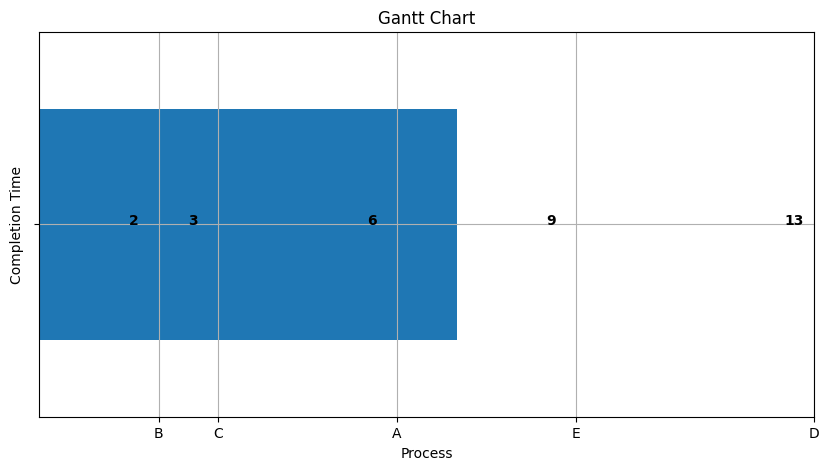

In [31]:
generate_gantt_chart(actual_answer)

In [32]:
check_actual_answer = actual_answer.sort_values(by=['Arrival Time', 'Burst Time'], ignore_index=True)

In [33]:
diff = check_actual_answer.compare(expected_answer)

if diff.empty:
    print("Your answer is correct")
else:
    print("Your answer is incorrect")
    
diff    

Your answer is correct


Empty DataFrame
Columns: []
Index: []

In [34]:
from pandas.testing import assert_frame_equal
assert_frame_equal(check_actual_answer, expected_answer)